
This dataset contains socio-economic indicators for various countries. It includes information such as child mortality rates, exports and imports, income levels, inflation rates, life expectancy, fertility rates, and gross domestic product per capita (GDPP). These indicators offer insights into a country's overall well-being and economic health. Analyzing this dataset can help identify patterns and relationships among these factors, aiding in the assessment of a country's development and potential challenges.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving geo info of the countries-data.csv to geo info of the countries-data.csv


Import the necessary Libraries to implement PCA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Load CSV file into a DataFrame
df = pd.read_csv('geo info of the countries-data.csv')

Write a code to Read and Understand the Dataset

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


View dimensions of dataset and Datatype

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# View dimensions of dataset and Datatype
print("Dimensions of dataset:", df.shape)
print("Data types of columns:", df.dtypes)


Dimensions of dataset: (167, 10)
Data types of columns: country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


Information about the dataframe

In [ ]:
# Information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Statistical details

In [ ]:
# Statistical details
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Describe the column with object type.

In [ ]:
# Describe the column with object type
df.describe(include=['object'])

,country
count,167
unique,167
top,Afghanistan
freq,1


Plot the unique values

In [ ]:
# Plot the unique values
for column in df.columns:
    print(column, df[column].nunique())

country 167
child_mort 139
exports 147
health 147
imports 151
income 156
inflation 156
life_expec 127
total_fer 138
gdpp 157


Write a code to Determine the negative values in the inflation feature.

In [ ]:
# Determine the negative values in the inflation feature
negative_inflation = df[df['inflation'] < 0]

Write a code to Number of negative values of inflation.

In [ ]:
# Number of negative values of inflation
num_negative_inflation = len(negative_inflation)
num_negative_inflation

8

Write a code to Find out the Missing values in the given dataset.

In [ ]:
# Find out the Missing values in the given dataset
missing_values = df.isnull().sum()

Write a code to Find out the Duplicated data in the given dataset.

In [ ]:
# Find out the Duplicated data in the given dataset
duplicated_data = df.duplicated()

Write a code to Investigating the Outliers

In [ ]:
# Investigating the Outliers
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

<ipython-input-16-dd32c7da9119>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


Write a code to Separate numerical and categorical features

In [ ]:
# Separate numerical and categorical features
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]

Write a code to Draw the boxplot for the outliers

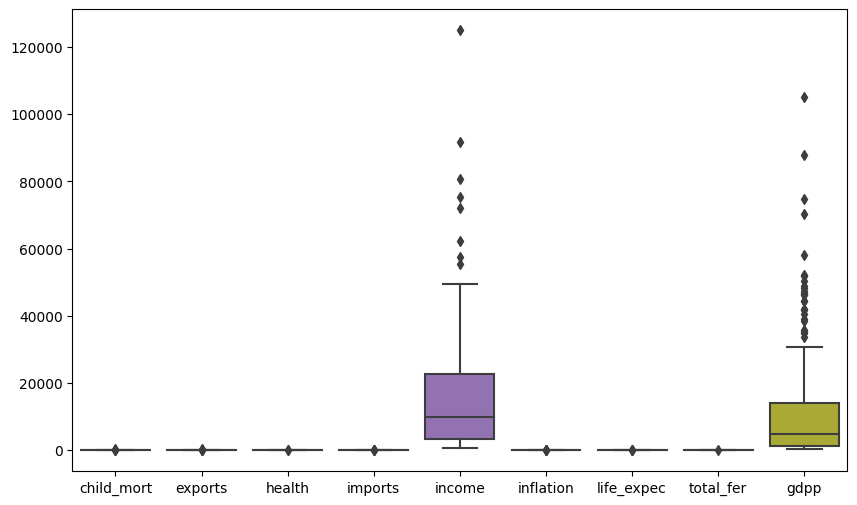

In [ ]:
# Draw the boxplot for the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_df)
plt.show()


What is your view on the right-skewed shape and a left-skewed of the given dataset?


Right-skewed shape indicates that the right tail of the distribution is longer or fatter than the left tail.
Left-skewed shape indicates that the left tail of the distribution is longer or fatter than the right tail.

Write a code to Draw the pairplot for noises

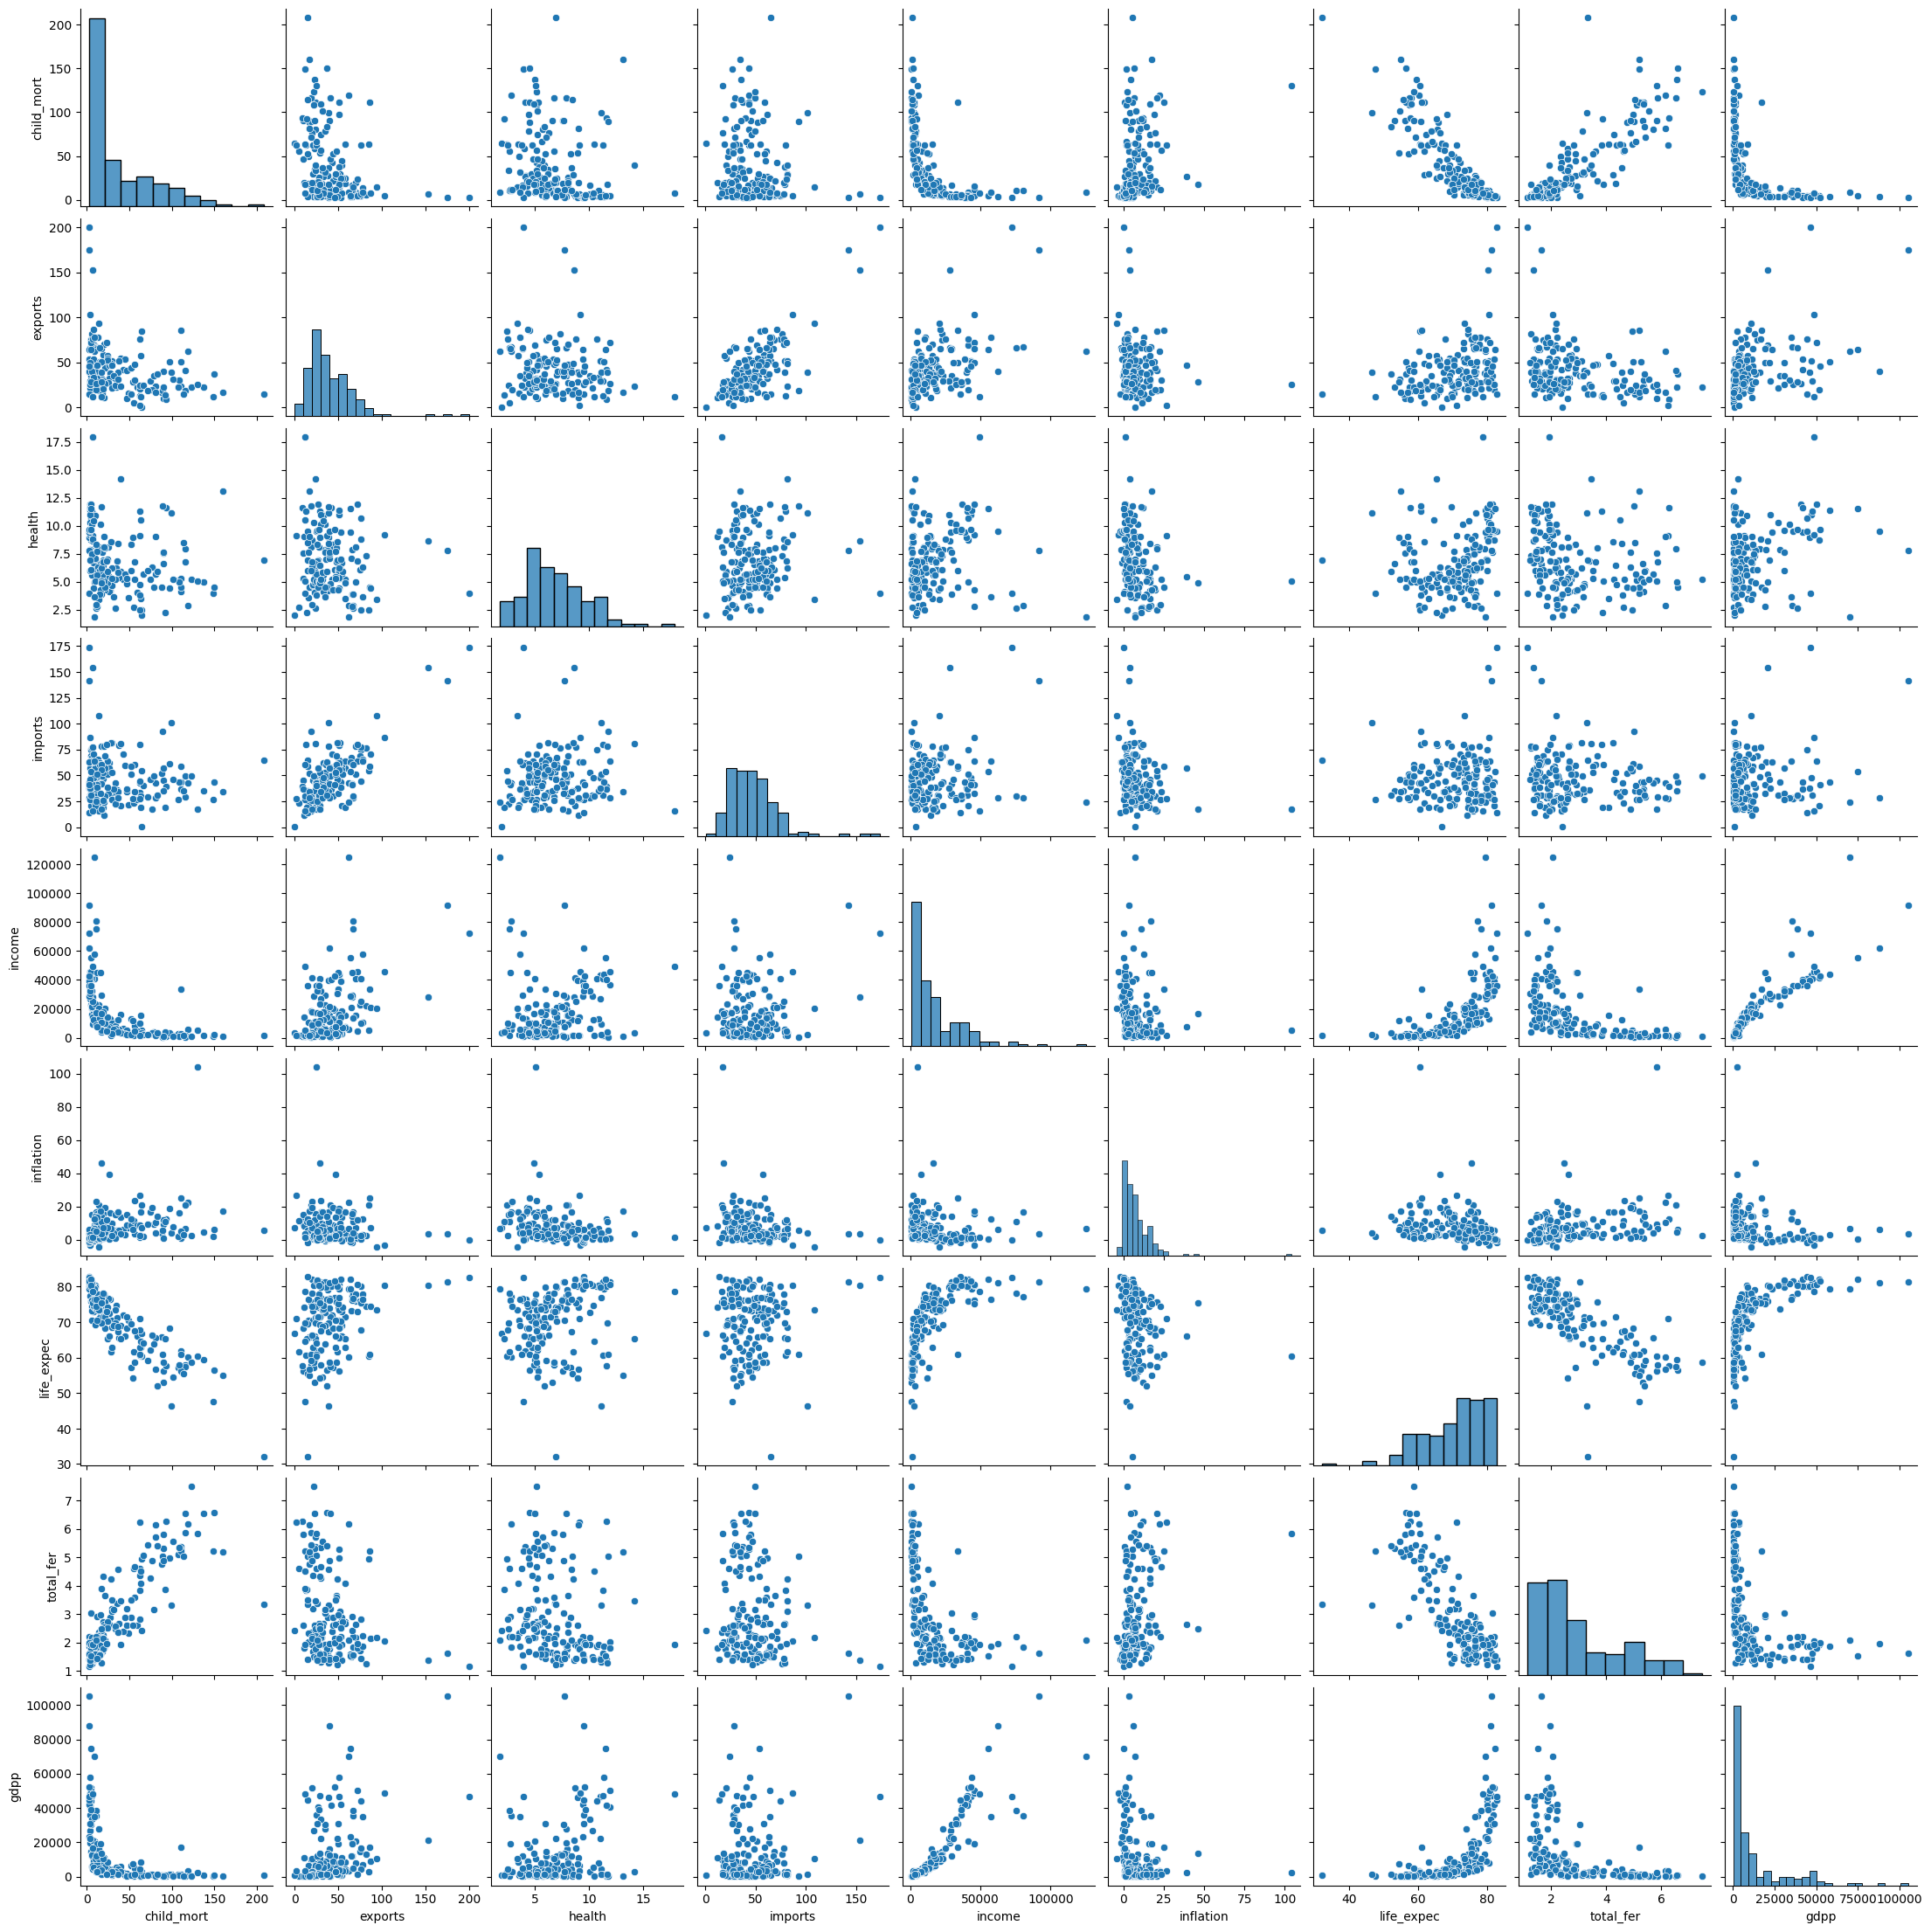

In [ ]:
# Draw the pairplot for noises
sns.pairplot(df)
plt.show()


Write a code to Exploratory Data Analysis (EDA)

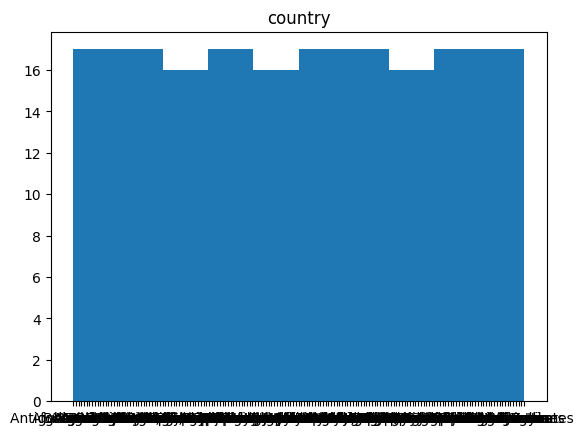

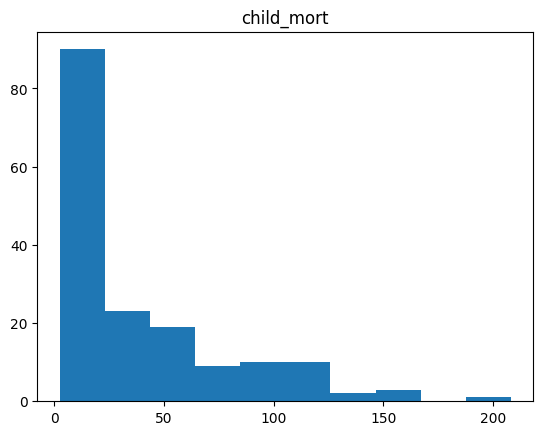

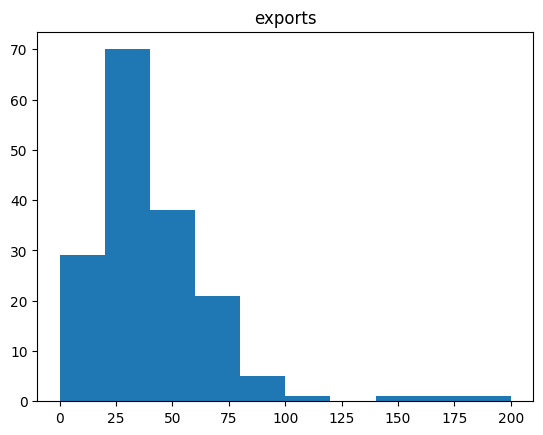

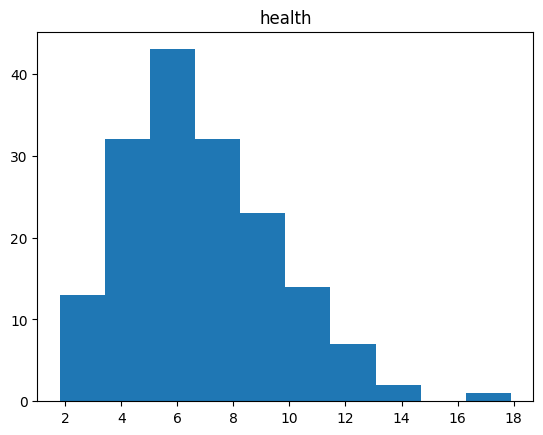

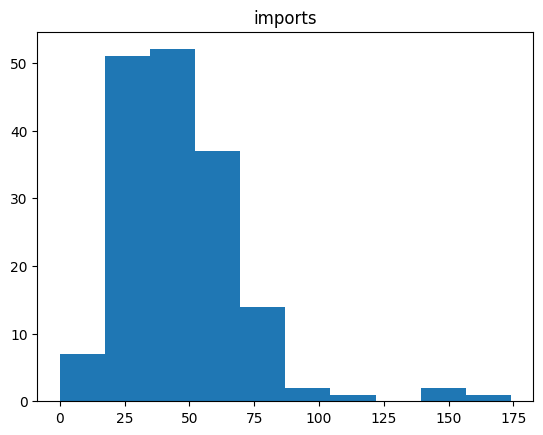

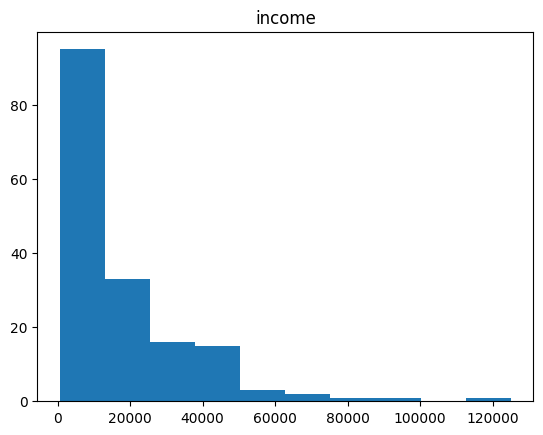

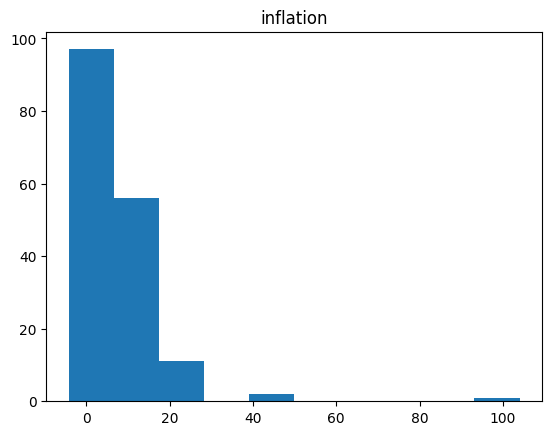

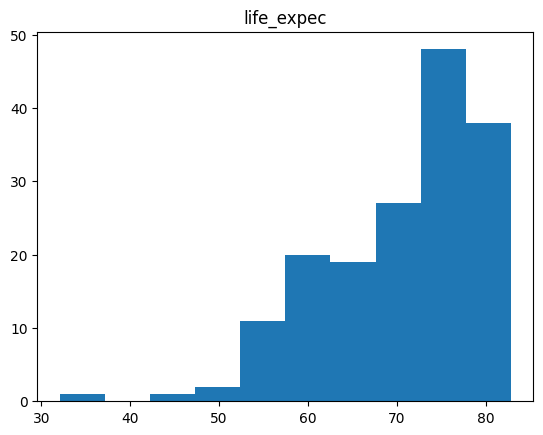

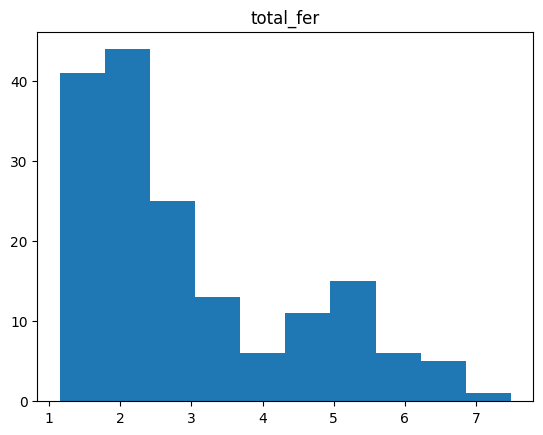

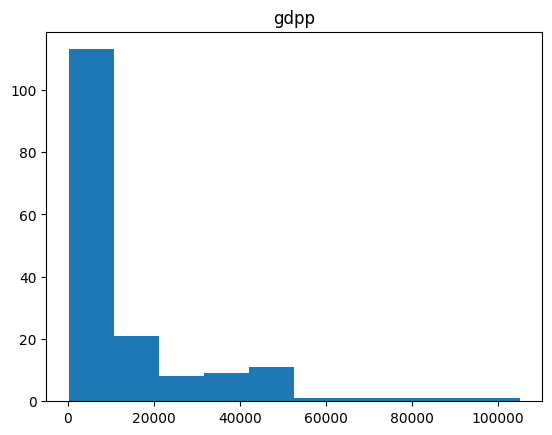

<ipython-input-77-ec80264ae8b3>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


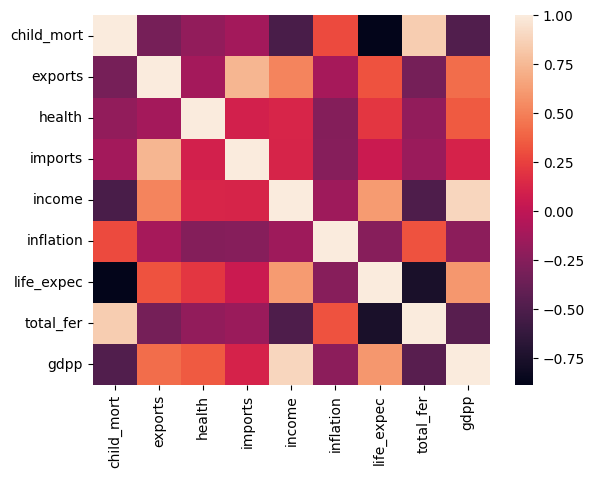

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def eda(df):
  for column in df.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

  # Plot the correlation matrix
  sns.heatmap(df.corr())
  plt.show()

if __name__ == "__main__":
  df = pd.read_csv("geo info of the countries-data.csv")
  eda(df)

Write a code to Check variables distribution

country
count             167
unique            167
top       Afghanistan
freq                1
Name: country, dtype: object


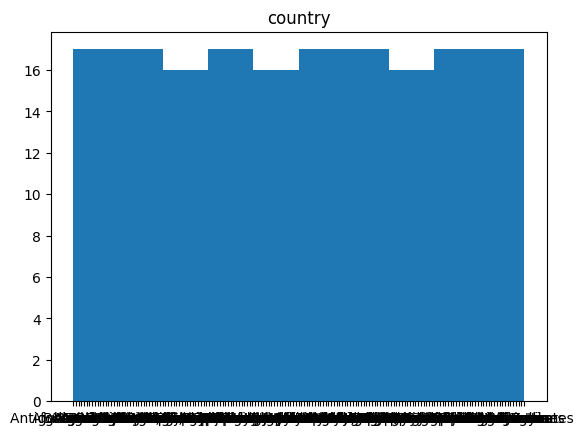

child_mort
count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64


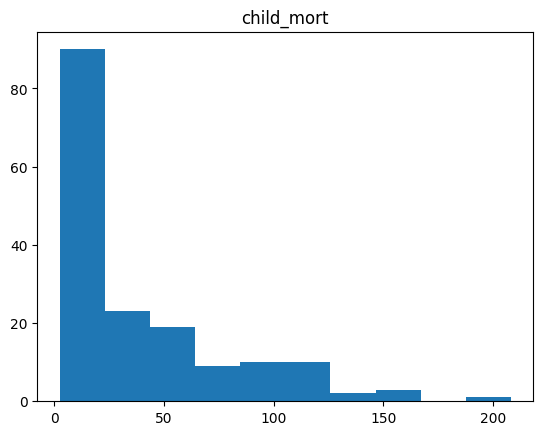

exports
count    167.000000
mean      41.108976
std       27.412010
min        0.109000
25%       23.800000
50%       35.000000
75%       51.350000
max      200.000000
Name: exports, dtype: float64


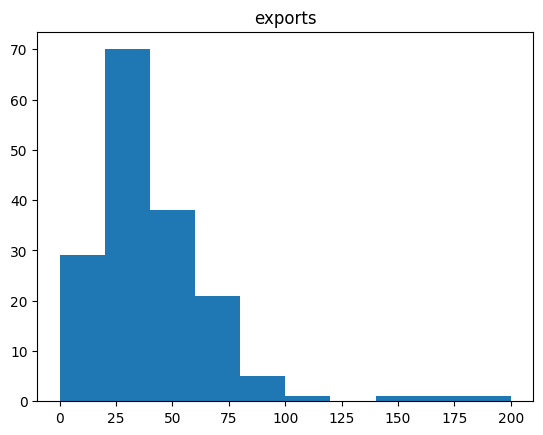

health
count    167.000000
mean       6.815689
std        2.746837
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       17.900000
Name: health, dtype: float64


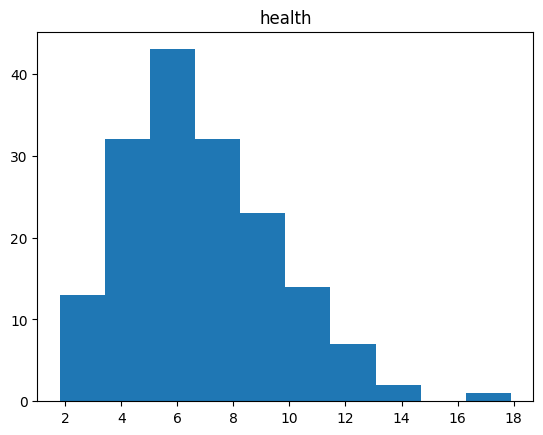

imports
count    167.000000
mean      46.890215
std       24.209589
min        0.065900
25%       30.200000
50%       43.300000
75%       58.750000
max      174.000000
Name: imports, dtype: float64


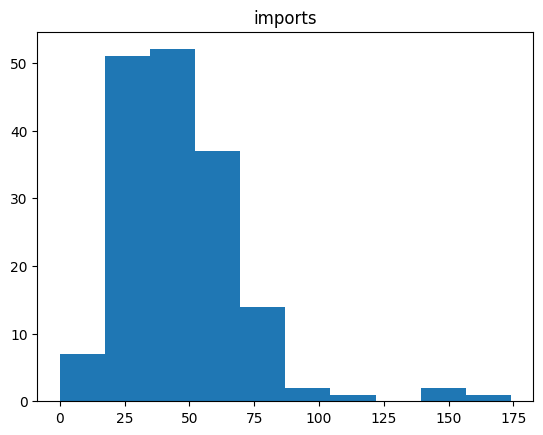

income
count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64


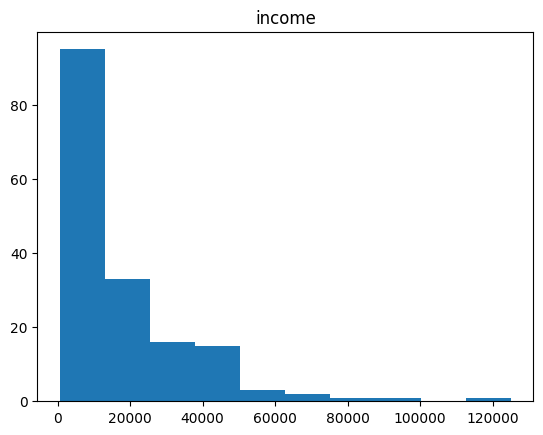

inflation
count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64


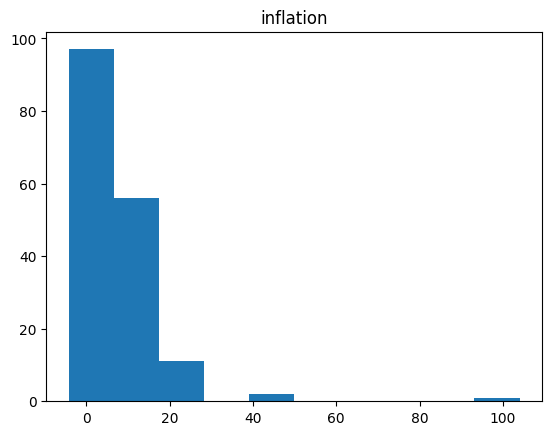

life_expec
count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64


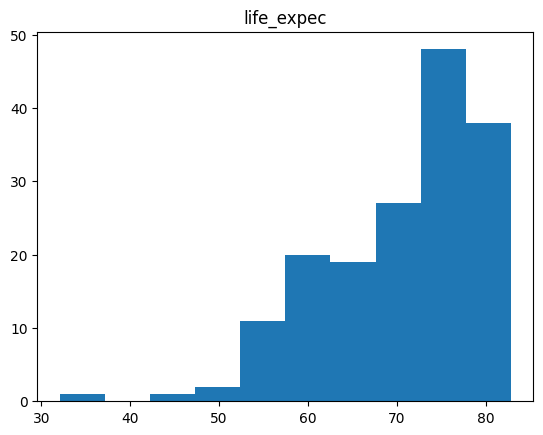

total_fer
count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64


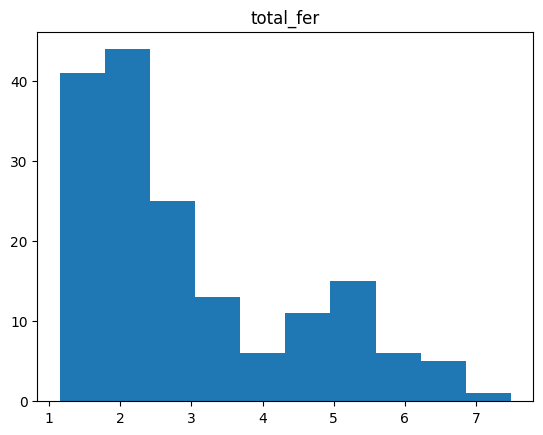

gdpp
count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64


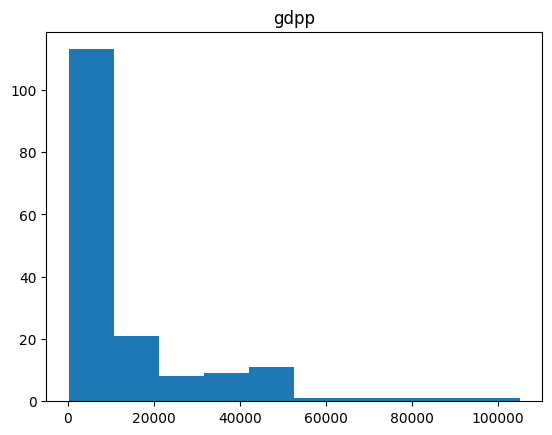

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def check_variables_distribution(dataframe):
  for column in dataframe.columns:
    print(column)
    print(dataframe[column].describe())
    plt.hist(dataframe[column])
    plt.title(column)
    plt.show()



if __name__ == "__main__":
  dataframe = pd.read_csv("geo info of the countries-data.csv")
  check_variables_distribution(dataframe)

Write a code to Plot histogram with density curve

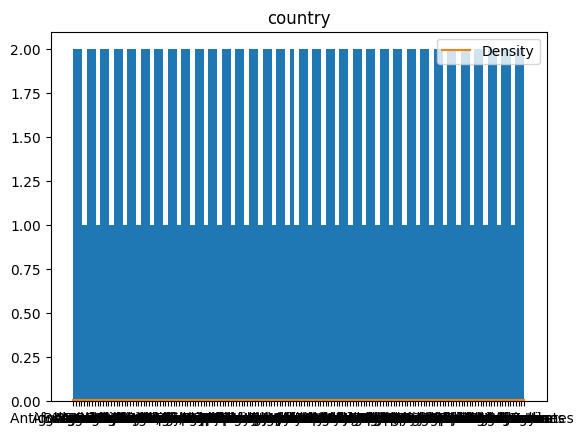

In [ ]:

import matplotlib.pyplot as plt
def plot_histogram_with_density_curve(dataframe,country, bins=100):
  plt.hist(dataframe[country], bins=bins)
  plt.title(country)
  plt.plot(dataframe[country].value_counts().sort_index().index,
  dataframe[country].value_counts().sort_index() / len(dataframe),
  label="Density")
  plt.legend()
  plt.show()



if __name__ == "__main__":
  dataframe = pd.read_csv("geo info of the countries-data.csv")
  plot_histogram_with_density_curve(dataframe, "country")

Write a code to create an empty DataFrame to store the results

In [ ]:
import pandas as pd
def create_empty_dataframe(columns):
  dataframe = pd.DataFrame(columns=columns)
  return dataframe
if __name__ == "__main__":
  columns = ["country", "income", "health"]
  dataframe = create_empty_dataframe(columns)
  print(dataframe)

Empty DataFrame
Columns: [country, income, health]
Index: []


Check variables skewness

In [ ]:

# Check variables skewness
features_to_check = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
results_df = pd.DataFrame(columns=['Feature', 'Skewness', 'Skewness Type'])


Create a list of features to check

In [ ]:

for feature in features_to_check:
    skewness = df[feature].skew()
    skewness_type = 'Positive' if skewness > 0 else 'Negative'
    results_df = results_df.append({'Feature': feature, 'Skewness': skewness, 'Skewness Type': skewness_type}, ignore_index=True)

<ipython-input-25-142e7db0e811>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Skewness': skewness, 'Skewness Type': skewness_type}, ignore_index=True)
<ipython-input-25-142e7db0e811>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Skewness': skewness, 'Skewness Type': skewness_type}, ignore_index=True)
<ipython-input-25-142e7db0e811>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Skewness': skewness, 'Skewness Type': skewness_type}, ignore_index=True)
<ipython-input-25-142e7db0e811>:4: FutureWarning: The frame.append method is deprecated and will be removed from

Gain a better understanding of the features,eg:child mortality rate, Exports, health, imports, Income, inflation, life_expec, total fertility, gdp

Get the top and bottom 10 countries for the above parameters

In [ ]:
# Gain a better understanding of the features
top_10_child_mort = df.nlargest(10, 'child_mort')
bottom_10_child_mort = df.nsmallest(10, 'child_mort')

In [ ]:
top_10_exports = df.nlargest(10, 'exports')
bottom_10_exports = df.nsmallest(10, 'exports')

In [ ]:
top_10_health = df.nlargest(10, 'health')
bottom_10_health = df.nsmallest(10, 'health')


In [ ]:
top_10_imports = df.nlargest(10, 'imports')
bottom_10_imports = df.nsmallest(10, 'imports')

In [ ]:
top_10_income = df.nlargest(10, 'income')
bottom_10_income = df.nsmallest(10, 'income')

In [ ]:
top_10_inflation = df.nlargest(10, 'inflation')
bottom_10_inflation = df.nsmallest(10, 'inflation')

In [ ]:
top_10_life_expec = df.nlargest(10, 'life_expec')
bottom_10_life_expec = df.nsmallest(10, 'life_expec')

In [ ]:
top_10_total_fer = df.nlargest(10, 'total_fer')
bottom_10_total_fer = df.nsmallest(10, 'total_fer')

In [ ]:

top_10_gdpp = df.nlargest(10, 'gdpp')
bottom_10_gdpp = df.nsmallest(10, 'gdpp')

Create a boolean mask for the top and bottom 10 countries

In [ ]:
# Create a boolean mask for the top and bottom 10 countries
top_10_mask = df['country'].isin(top_10_child_mort['country']) | df['country'].isin(top_10_exports['country']) | \
              df['country'].isin(top_10_health['country']) | df['country'].isin(top_10_imports['country']) | \
                            df['country'].isin(top_10_income['country']) | df['country'].isin(top_10_inflation['country']) | \
                                          df['country'].isin(top_10_life_expec['country']) | df['country'].isin(top_10_total_fer['country']) | \
                                                        df['country'].isin(top_10_gdpp['country'])

In [ ]:
bottom_10_mask = df['country'].isin(bottom_10_child_mort['country']) | df['country'].isin(bottom_10_exports['country']) | \
                 df['country'].isin(bottom_10_health['country']) | df['country'].isin(bottom_10_imports['country']) | \
                                  df['country'].isin(bottom_10_income['country']) | df['country'].isin(bottom_10_inflation['country']) | \
                                                   df['country'].isin(bottom_10_life_expec['country']) | df['country'].isin(bottom_10_total_fer['country']) | \
                                                                    df['country'].isin(bottom_10_gdpp['country'])

**Create the bar plot**


Add labels and title

Rotate the x-axis labels for better readability

Display the plot


<Axes: xlabel='child_mort', ylabel='country'>

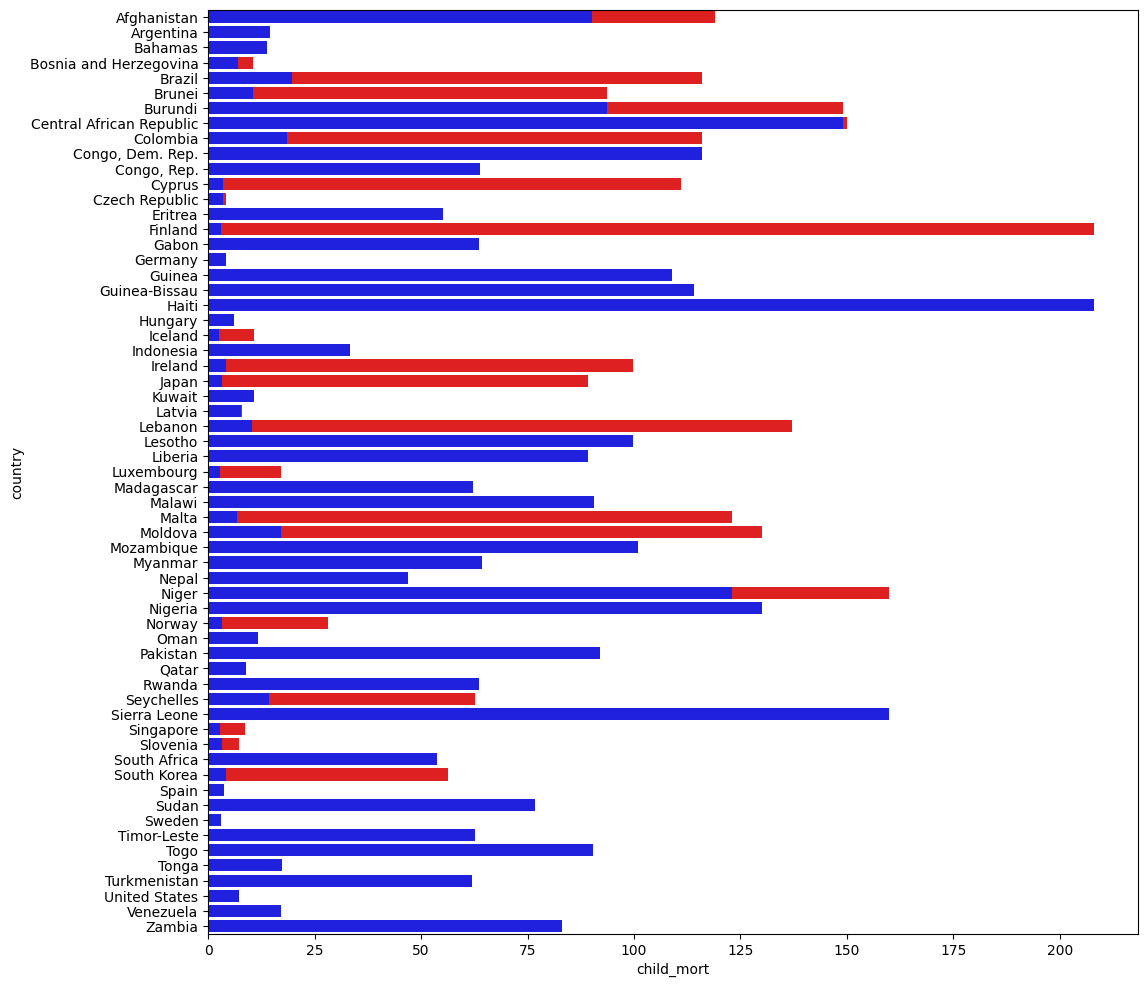

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x='child_mort', y='country', data=df[top_10_mask], color='red', label='Top 10')
sns.barplot(x='child_mort', y='country', data=df[bottom_10_mask], color='blue', label='Bottom 10')


Write a code to Multivariate relationships between numeric variables

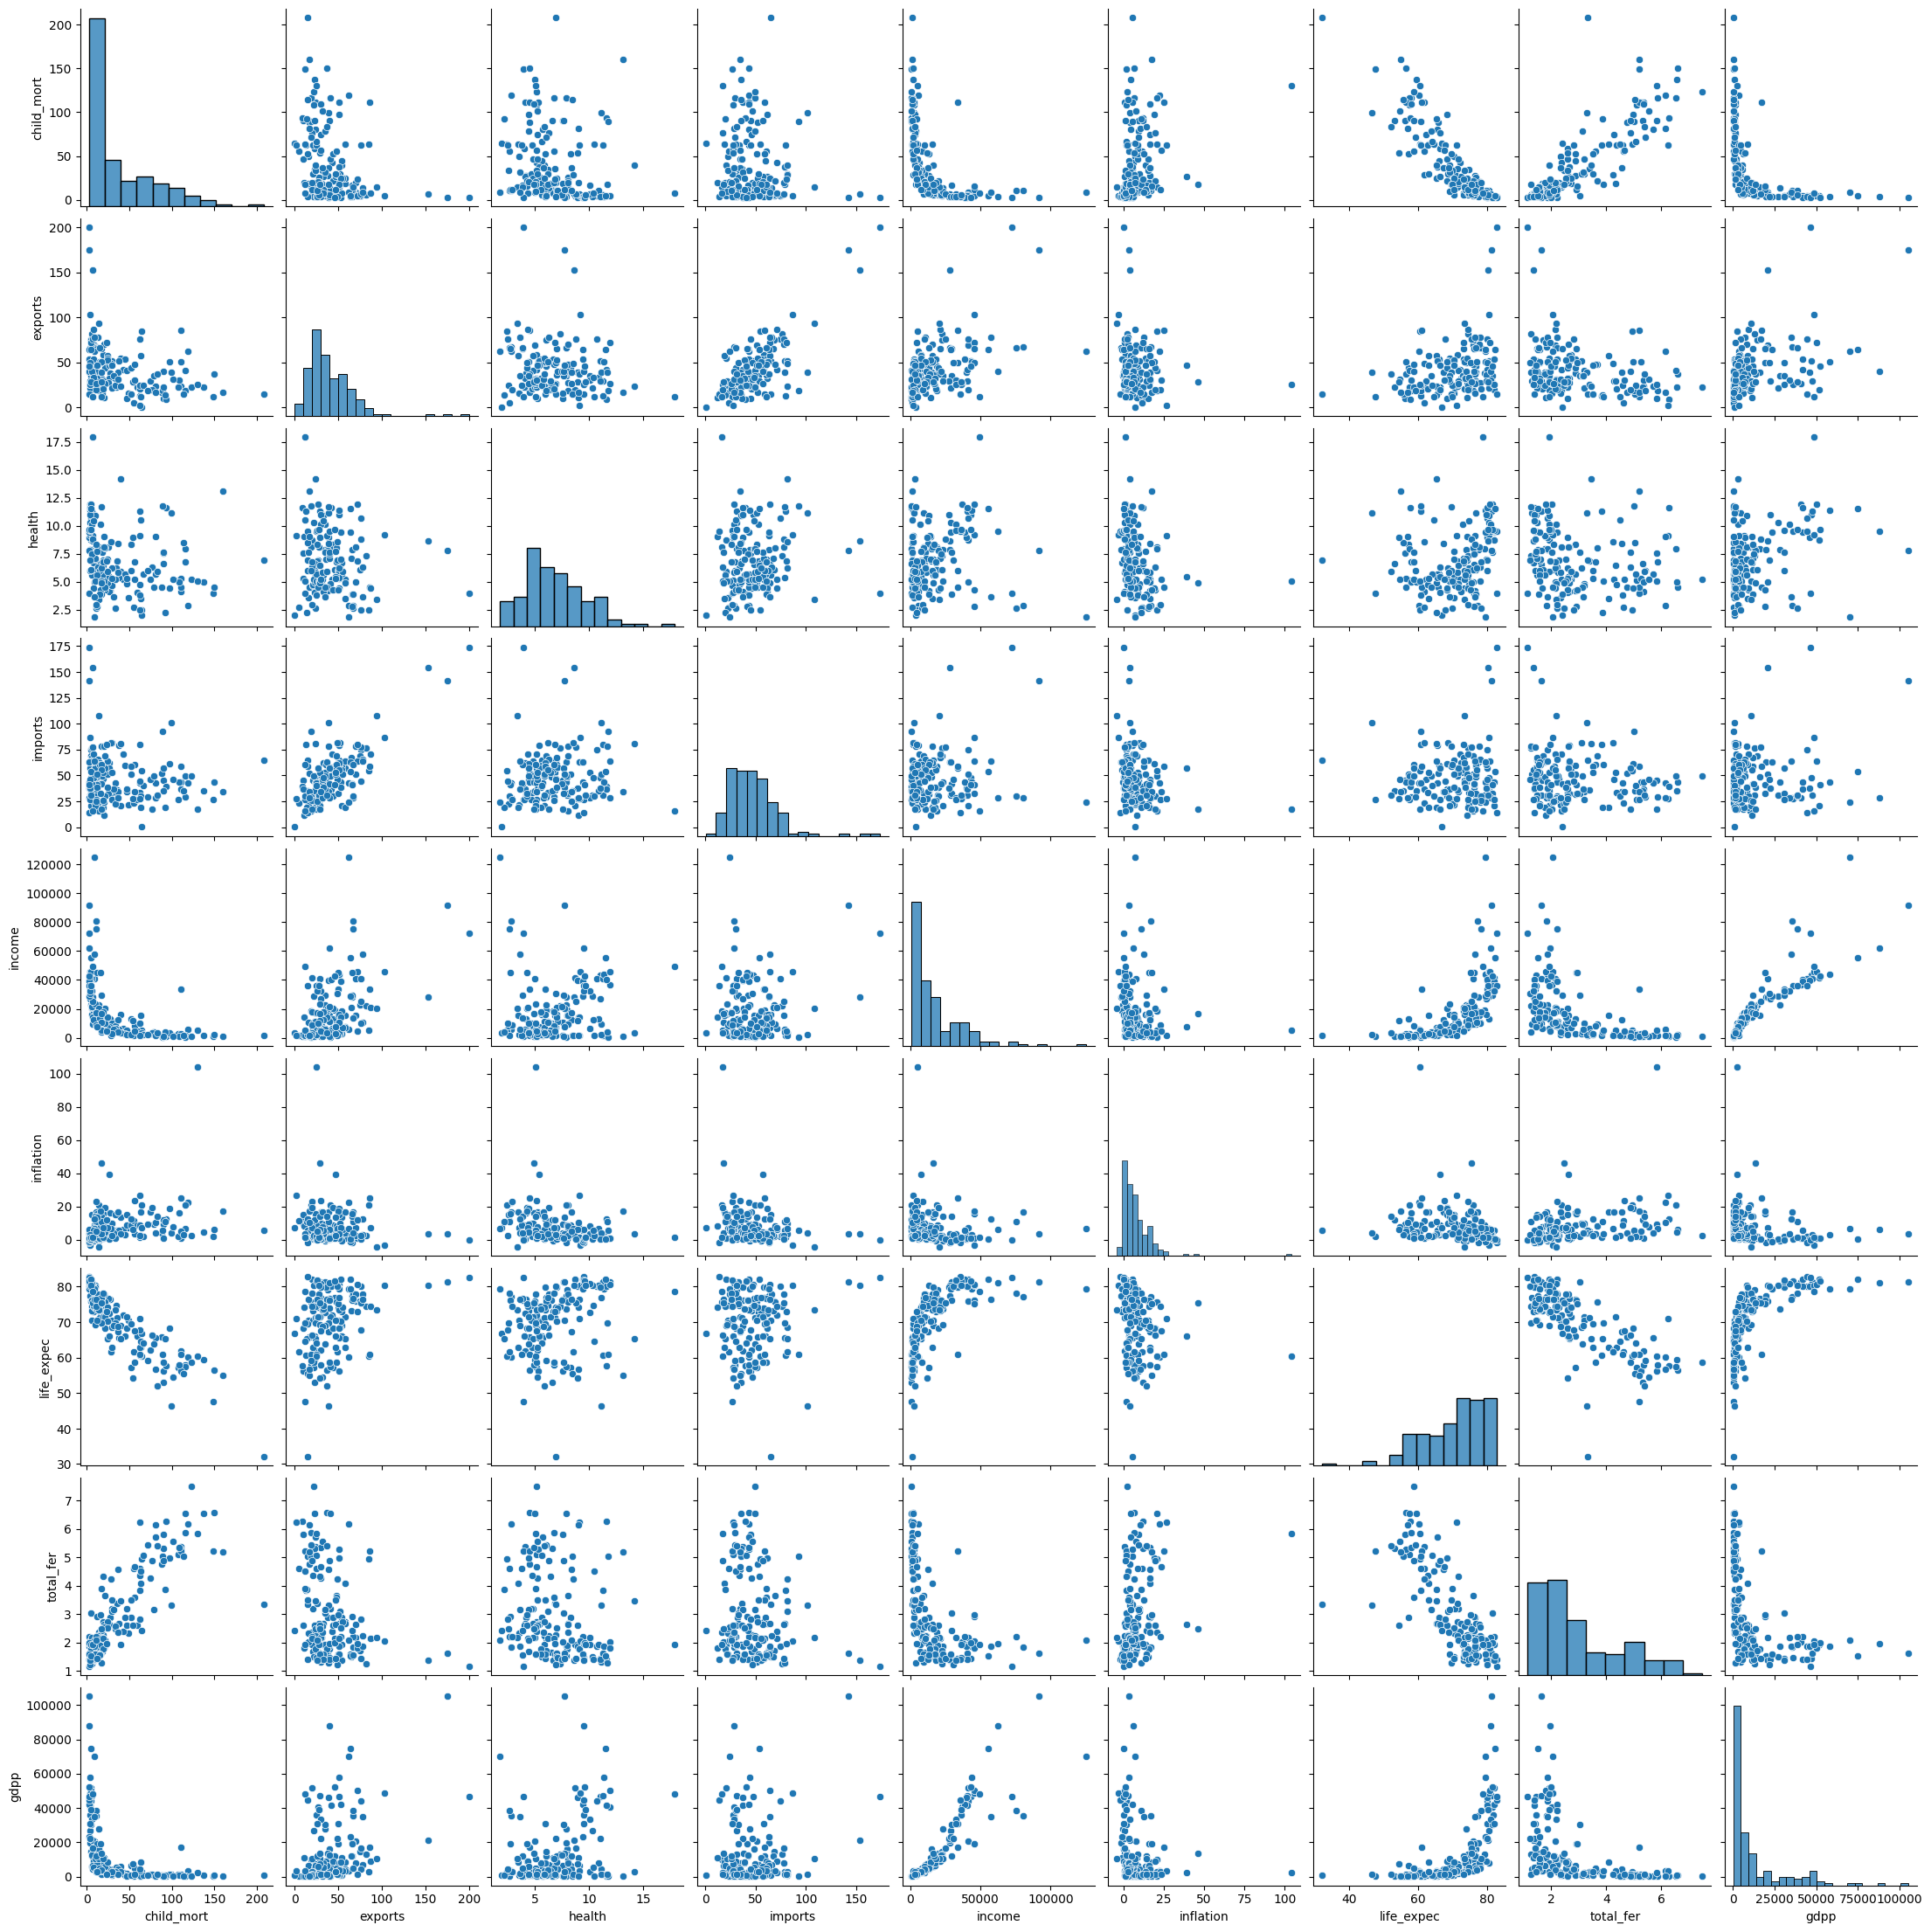

In [ ]:
# Multivariate relationships between numeric variables
sns.pairplot(df[numerical_features])
plt.show()


Write a code to Correlation between the features

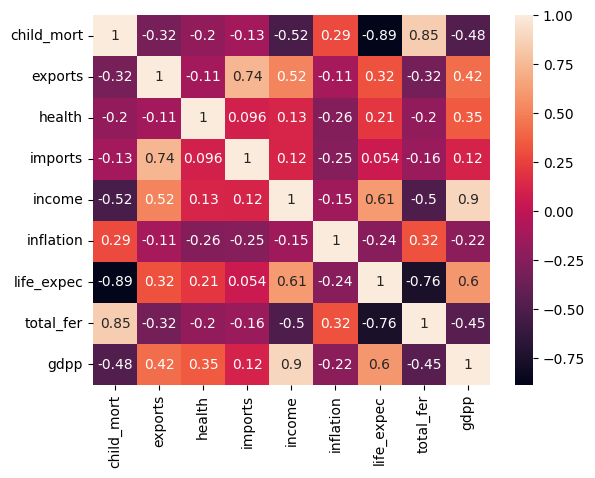

In [ ]:
# Correlation between the features
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Create PCA object and fit the scaled data

In [ ]:
# PCA
# Create PCA object and fit the scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])
pca = PCA()
pca.fit(scaled_data)

PCA()

Transform the data to its principal components

In [ ]:
# Transform the data to its principal components
principal_components = pca.transform(scaled_data)

Get the number of principal components

In [ ]:
# Get the number of principal components
num_components = pca.components_.shape[0]

Print the number of principal components

In [ ]:
# Print the number of principal components
print("Number of Principal Components:", num_components)

Number of Principal Components: 9


Print the explained variance of each principal components

In [ ]:
# Print the explained variance of each principal component
print("Explained Variance of Each Principal Component:", pca.explained_variance_)


Explained Variance of Each Principal Component: [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]


Print the total variance explained by all the principal components

In [ ]:
# Print the total variance explained by all the principal components
print("Total Variance Explained by All Principal Components:", pca.explained_variance_.sum())


Total Variance Explained by All Principal Components: 9.05421686746988


Print the explained variance ratio of each principal components

In [ ]:
# Print the explained variance ratio of each principal component
print("Explained Variance Ratio of Each Principal Component:", pca.explained_variance_ratio_)

Explained Variance Ratio of Each Principal Component: [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Calculate percentage variation

In [ ]:
# Calculate percentage variation
percentage_var = np.round(pca.explained_variance_ratio_ * 100, decimals=2)

Variance explained by each dimension

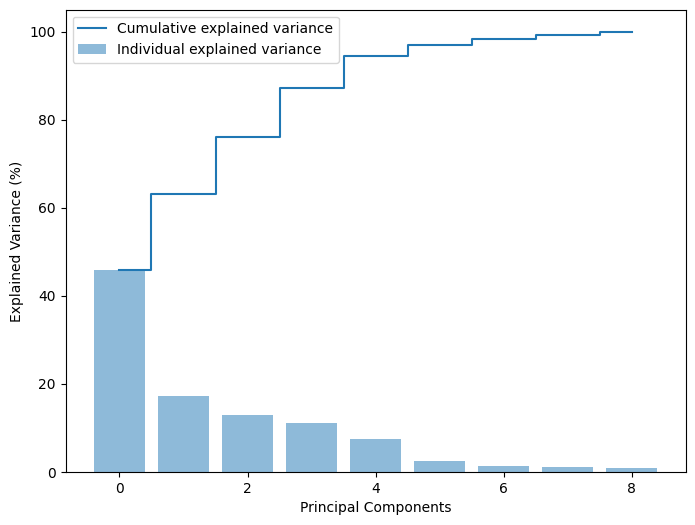

In [ ]:
# Variance explained by each dimension
plt.figure(figsize=(8, 6))
plt.bar(range(num_components), percentage_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(num_components), np.cumsum(percentage_var), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.legend()
plt.show()

plot PCA1 vs PCA2

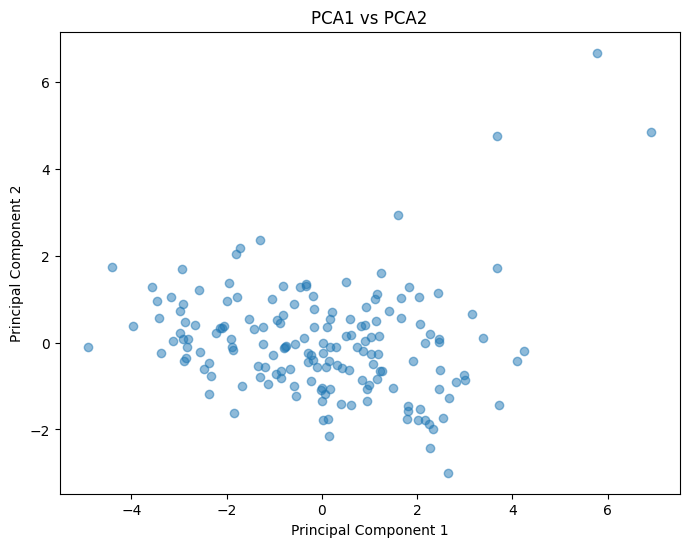

In [ ]:
# Plot PCA1 vs PCA2
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA1 vs PCA2')
plt.show()


plot PCA1 vs PCA3

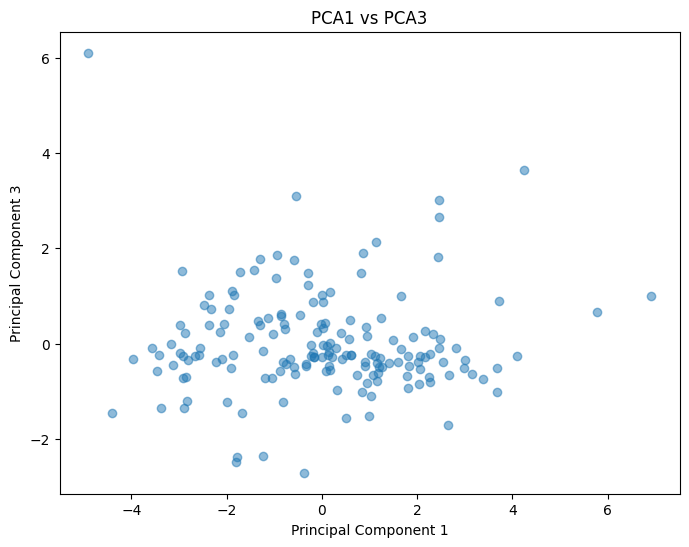

In [ ]:
# Plot PCA1 vs PCA3
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 2], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA1 vs PCA3')
plt.show()

Principal Component Data Decomposition
* Initialize PCA with 5 components  




In [ ]:
# Principal Component Data Decomposition
# Initialize PCA with 5 components
pca = PCA(n_components=5)
pca.fit(scaled_data)

PCA(n_components=5)

Fit and transform the scaled data

In [ ]:
# Fit and transform the scaled data
principal_components = pca.transform(scaled_data)

Create a DataFrame from the transformed data

In [ ]:
# Create a DataFrame from the transformed data
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principal_df

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365
